<a href="https://colab.research.google.com/github/PalakAggarwal13/ML_Projects/blob/main/Project_9_HeartDiseasePrediction/HeartDiseasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import metrics

In [3]:
from google.colab import files
uploaded = files.upload()

Saving heart_disease_data.csv to heart_disease_data.csv


In [4]:
df = pd.read_csv('heart_disease_data.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.shape

(303, 14)

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
correlation = df.corr()

<Axes: >

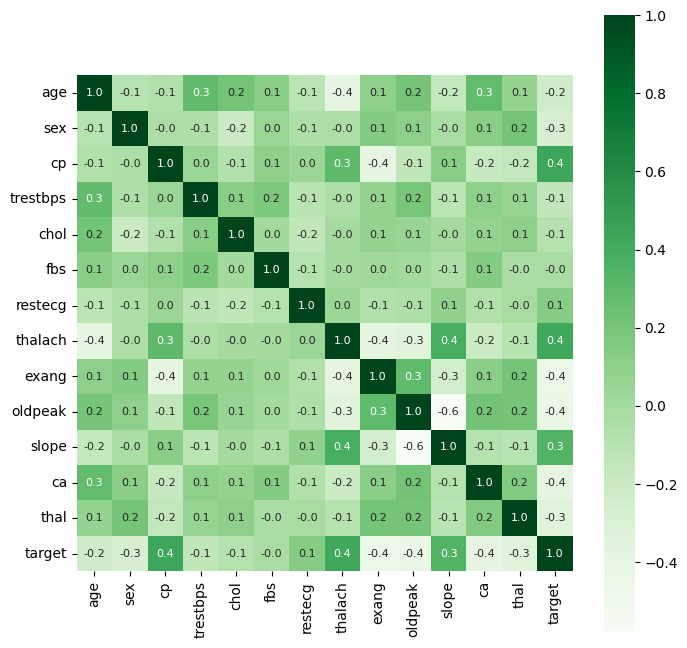

In [13]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation , cbar=True ,square=True, fmt='.1f' ,annot=True, annot_kws={'size':8},cmap='Greens')

In [15]:
df['target'].value_counts()

,count
target,
1,165
0,138


In [16]:
X = df.drop(['target'],axis=1)
Y = df['target']

In [17]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.3,stratify=Y,random_state=4)

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
models = {
    'RandomForest' : RandomForestClassifier(n_estimators=100),
    'LogisticRegression' : LogisticRegression(max_iter=1000),
    'SVM' : SVC(C=10,degree=3),
    'XGBoost' : XGBClassifier(eval_metric='logloss')
}

In [45]:
import time

best_model = None
best_name = None
best_score = 0

kernels = [('linear','linear'),
            ('rbf','rbf'),
            ('poly','poly'),
            ('sigmoid','sigmoid')]

for name , model in models.items():
  if name == 'SVM':
    for name1, kernel in kernels:
      print(f"Running SVM with kernel = {kernel}")
      svm_model = SVC(kernel=kernel, C=10, degree=3)
      start = time.time()
      svm_model.fit(X_train_scaled,Y_train)
      preds = svm_model.predict(X_test_scaled)
      end = time.time()
      print('duration:',end-start)
      accuracy = metrics.accuracy_score(Y_test, preds)
      if accuracy > best_score:
          best_score = accuracy
          best_model = svm_model
          best_name = name
      print('Accuracy:',accuracy)
      print()

  else:
    print(name)
    start = time.time()
    model.fit(X_train_scaled,Y_train)
    preds = model.predict(X_test_scaled)
    end = time.time()
    print('duration:',end-start)
    accuracy = metrics.accuracy_score(Y_test, preds)
    if accuracy > best_score:
        best_score = accuracy
        best_model = model
        best_name = name
    print('Accuracy:',accuracy)
    print()

print("Best model:", best_name)
print("Best accuracy:", best_score)

RandomForest
duration: 0.18274903297424316
Accuracy: 0.8571428571428571

LogisticRegression
duration: 0.0034046173095703125
Accuracy: 0.8571428571428571

Running SVM with kernel = linear
duration: 0.026402711868286133
Accuracy: 0.8571428571428571

Running SVM with kernel = rbf
duration: 0.008805036544799805
Accuracy: 0.8241758241758241

Running SVM with kernel = poly
duration: 0.0070095062255859375
Accuracy: 0.8021978021978022

Running SVM with kernel = sigmoid
duration: 0.006241798400878906
Accuracy: 0.7252747252747253

XGBoost
duration: 0.08891892433166504
Accuracy: 0.8461538461538461

Best model: RandomForest
Best accuracy: 0.8571428571428571


In [50]:
input_data = (64,1,3,110,211,0,0,144,1,1.8,1,0,2)
input_data_ar = np.asarray(input_data)
input_data_reshaped = input_data_ar.reshape(1,-1)

prediction = best_model.predict(input_data_reshaped)

if (prediction[0]==0):
  print("safe")
else:
  print("unsafe")

safe
